In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
plt.ioff()

In [2]:
df = pd.read_csv('./data/MBTA_Bus_Ridership_by_Time_Period_Route_Line_and_Stop_Fall.csv')

/tmp/ipykernel_18469/1845220859.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/MBTA_Bus_Ridership_by_Time_Period_Route_Line_and_Stop_Fall.csv')


In [3]:
df.shape

(1086511, 19)

In [4]:
df['year'] = df['season'].str.extract(r'(\d{4})').astype(int)

In [5]:
df.head()

,mode,season,route_id,route_name,route_variant,stop_sequence,direction_id,day_type_id,day_type_name,time_period_id,time_period_name,stop_name,stop_id,average_ons,average_offs,average_load,num_trips,ons_all_trips,ObjectId,year
0,3,Fall 2016,1,1,1-_-0,19,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ SIDNEY ST,101,1.400000,2.636842,32.894737,19,26.6,1,2016
1,3,Fall 2016,1,1,1-_-0,20,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ PROSPECT,102,3.868421,10.178947,26.584211,19,73.5,2,2016
2,3,Fall 2016,1,1,1-_-0,21,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ BIGELOW S,104,1.521053,1.168421,26.936842,19,28.9,3,2016
3,3,Fall 2016,1,1,1-_-0,22,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ HANCOCK S,106,0.321053,1.621053,25.626316,19,6.1,4,2016
4,3,Fall 2016,1,1,1-_-0,23,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ DANA ST,107,0.647368,3.336842,22.942105,19,12.3,5,2016


In [6]:
yearly_ridership = df.groupby(['route_id', 'year'])['ons_all_trips'].sum().reset_index()

In [7]:
yearly_ridership.rename(columns={'ons_all_trips': 'yearly_ons_all_trips'}, inplace=True)

# Step 3: Calculate Year-over-Year Change in Ridership
yearly_ridership['change'] = yearly_ridership.sort_values(['route_id', 'year']).groupby('route_id')['yearly_ons_all_trips'].diff()

# Step 4: Categorize Routes as Gained or Lost Riders
gains = yearly_ridership[yearly_ridership['change'] > 0]
losses = yearly_ridership[yearly_ridership['change'] < 0]

# Step 5: Identify Unique Routes with Gains or Losses
routes_with_gains = gains['route_id'].unique()
routes_with_losses = losses['route_id'].unique()

# Display Results
print("Routes with Gains in Ridership Over the Years:")
print(routes_with_gains)

print("\nRoutes with Losses in Ridership Over the Years:")
print(routes_with_losses)

Routes with Gains in Ridership Over the Years:
[1 5 7 8 9 10 11 14 15 16 17 18 19 21 22 36 37 38 39 40 41 42 43 44 45 47
 50 51 52 55 57 59 60 61 62 64 65 66 67 68 69 70 71 73 74 75 76 77 78 80
 83 85 86 87 88 89 90 91 92 93 94 95 96 97 99 100 101 104 105 106 108 109
 110 111 112 114 116 117 119 120 121 131 132 134 136 137 170 171 201 202
 210 211 214 215 217 240 411 424 426 428 429 430 434 435 436 439 441 442
 450 451 455 456 501 502 504 505 553 554 556 558 708 712 713 741 742 743
 746 747 749 751 '134' '19' '201' '21' '210' '211' '214' '215' '216' '217'
 '22' '220' '221' '222' '225' '226' '23' '230' '236' '238' '24' '240'
 '245' '26' '27' '28' '29' '30' '31' '32' '325' '326' '33' '34' '34E' '35'
 '350' '351' '354' '36' '37' '38' '39' '4' '40' '41' '411' '42' '424'
 '426' '428' '429' '43' '430' '434' '435' '436' '439' '44' '441' '442'
 '45' '450' '451' '455' '456' '47' '50' '503' '504' '51' '52' '55' '553'
 '554' '556' '558' '57' '57A' '59' '60' '61' '62' '64' '65' '66' '67' '68'
 '69

In [8]:
important_routes = [ '22', '29', '15', '45', '44', '42', '17', '23', '31', '26', '111', '24', '33', '14']

In [9]:
filtered_data = yearly_ridership[yearly_ridership['route_id'].isin(important_routes)]

In [23]:
filtered_data

,route_id,year,yearly_ons_all_trips,change
758,111,2024,11292.3,NaN
769,14,2023,1602.5,NaN
770,14,2024,552.5,-1050.0
771,15,2023,12280.7,NaN
772,15,2024,7183.1,-5097.6
...,...,...,...,...
1178,45,2018,5448.4,NaN
1179,45,2019,5382.0,-66.4
1180,45,2021,3216.2,-2165.8
1181,45,2023,3275.7,59.5


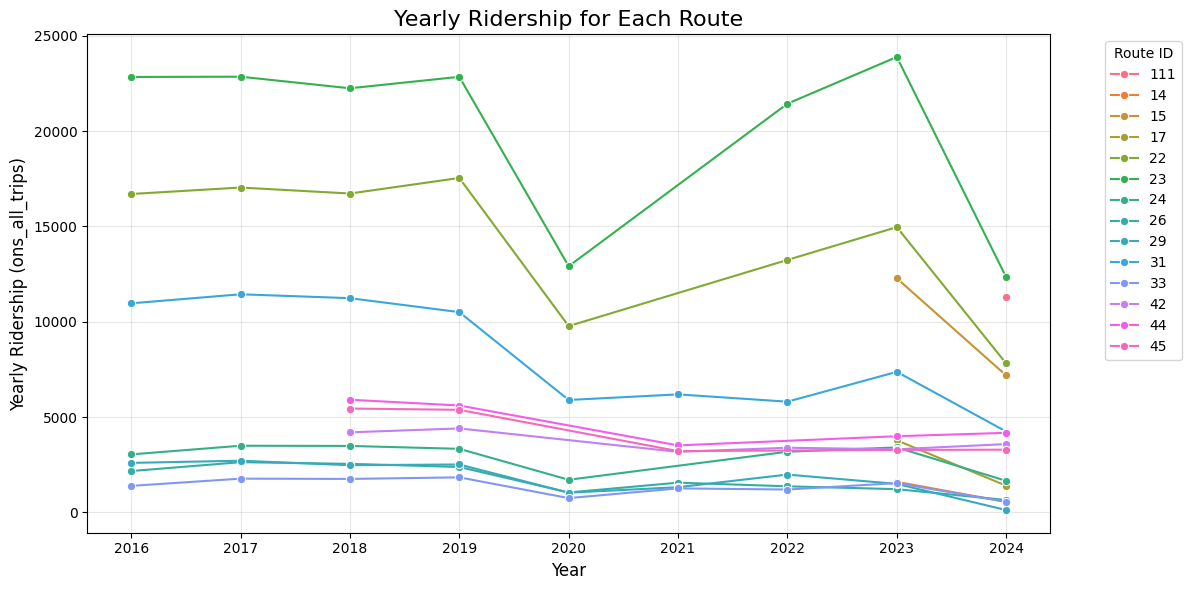

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=filtered_data, x='year', y='yearly_ons_all_trips', hue='route_id', marker='o')
# plt.title("Yearly Ridership for Each Route", fontsize=16)
# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Yearly Ridership (ons_all_trips)", fontsize=12)
# plt.legend(title="Route ID", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.savefig('yearly_ridership_per_route.png', dpi=400)

# Visualization 1: Yearly Ridership for Each Route
plotly_fig = px.line(filtered_data, x='year', y='yearly_ons_all_trips', color='route_id', markers=True)
plotly_fig.update_layout(
    title="Yearly Ridership for Each Route",
    xaxis_title="Year",
    yaxis_title="Yearly Ridership (ons_all_trips)",
    legend_title="Route ID",
    template='plotly_white'
)


plotly_fig.write_html("./Plots/Ridership/yearly_ridership_per_route.html")
plotly_fig.show()


In [13]:
# Visualization 2: Year-over-Year Change for Each Route
# plt.figure(figsize=(12, 6))
# sns.barplot(data=filtered_data, x='year', y='change', hue='route_id', dodge=True)
# plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
# plt.title("Year-over-Year Change in Ridership", fontsize=16)
# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Change in Ridership", fontsize=12)
# plt.legend(title="Route ID", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.savefig('yeary_change_per_route.png', dpi=400)
# plt.show()

# Visualization 2: Year-over-Year Change for Each Route
plotly_fig2 = px.bar(filtered_data, x='year', y='change', color='route_id', barmode='group')
plotly_fig2.update_layout(
    title="Year-over-Year Change in Ridership",
    xaxis_title="Year",
    yaxis_title="Change in Ridership",
    legend_title="Route ID",
    template='plotly_white'
)

plotly_fig2.write_html("./Plots/Ridership/yearly_change_per_route.html")
plotly_fig2.show()

In [14]:
# Step 4: Categorize Routes as Gained or Lost Riders
gains = filtered_data[filtered_data['change'] > 0]
losses = filtered_data[filtered_data['change'] < 0]

# Step 5: Identify Unique Routes with Gains or Losses
routes_with_gains = gains['route_id'].unique()
routes_with_losses = losses['route_id'].unique()

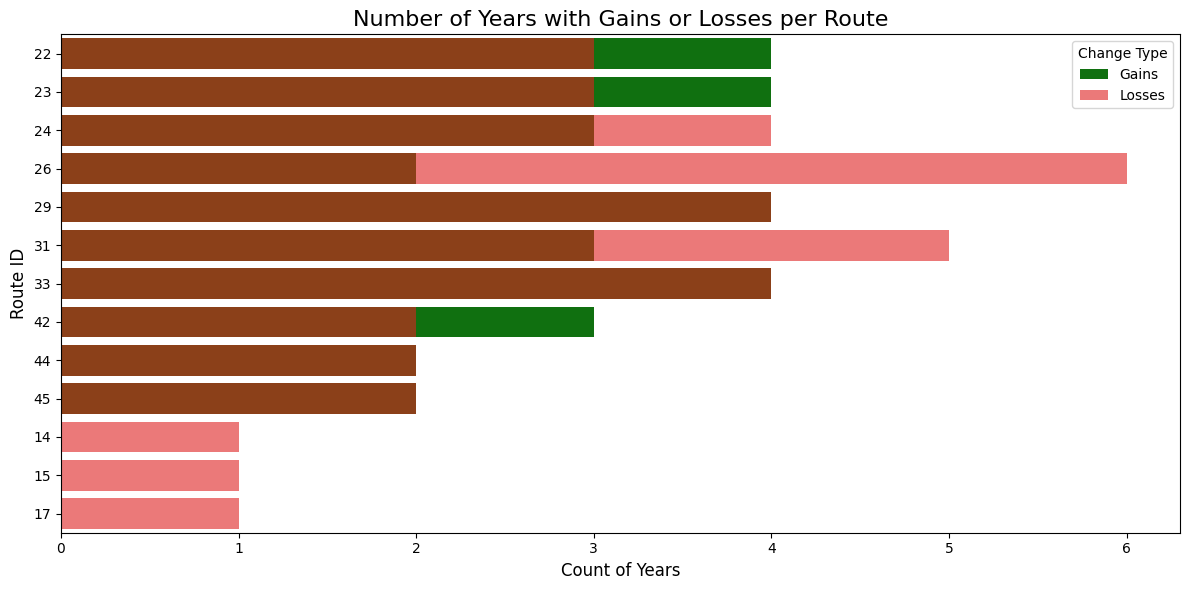

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.countplot(data=gains, y='route_id', color='green', label="Gains")
# sns.countplot(data=losses, y='route_id', color='red', label="Losses", alpha=0.6)
# plt.title("Number of Years with Gains or Losses per Route", fontsize=16)
# plt.xlabel("Count of Years", fontsize=12)
# plt.ylabel("Route ID", fontsize=12)
# plt.legend(title="Change Type")
# plt.tight_layout()
# plt.show()

# df = pd.concat([
#     gains .assign(ChangeType='Gains'),
#     losses.assign(ChangeType='Losses')
# ])
# fig_plotly3 = px.histogram(
#     df,
#     y='route_id',
#     color='ChangeType',
#     barmode='stack',
#     category_orders={'route_id': sorted(df['route_id'].unique())},
#     title="Number of Years with Gains or Losses per Route",
#     labels={'count':'Count of Years', 'route_id':'Route ID'}
# )

# fig_plotly3.update_layout(legend_title="Change Type", template='plotly_white')
# fig_plotly3.show()
# # # Visualization 3: Highlight Routes with Gains and Losses
# # plotly_fig3 = go.Figure()
# # plotly_fig3.add_trace(go.Bar(
# #     y=gains['route_id'],
# #     x=gains['change'],
# #     name='Gains',
# #     orientation='h',
# #     marker=dict(color='green')
# # ))
# # plotly_fig3.add_trace(go.Bar(
# #     y=losses['route_id'],
# #     x=losses['change'],
# #     name='Losses',
# #     orientation='h',
# #     marker=dict(color='red')
# # ))

# # # plotly_fig3 = px.histogram(filtered_data, x='route_id', color='change', barmode='group')
# # plotly_fig3.update_layout(
# #     barmode='stack',
# #     title="Number of Years with Gains or Losses per Route",
# #     xaxis_title="Count of Years",
# #     yaxis_title="Route ID",
# #     legend_title="Change Type",
# #     template='plotly_white'
# # )
# # plotly_fig3.write_html("./Plots/Ridership/years_with_gains_losses_per_route.html")
# # plotly_fig3.show()

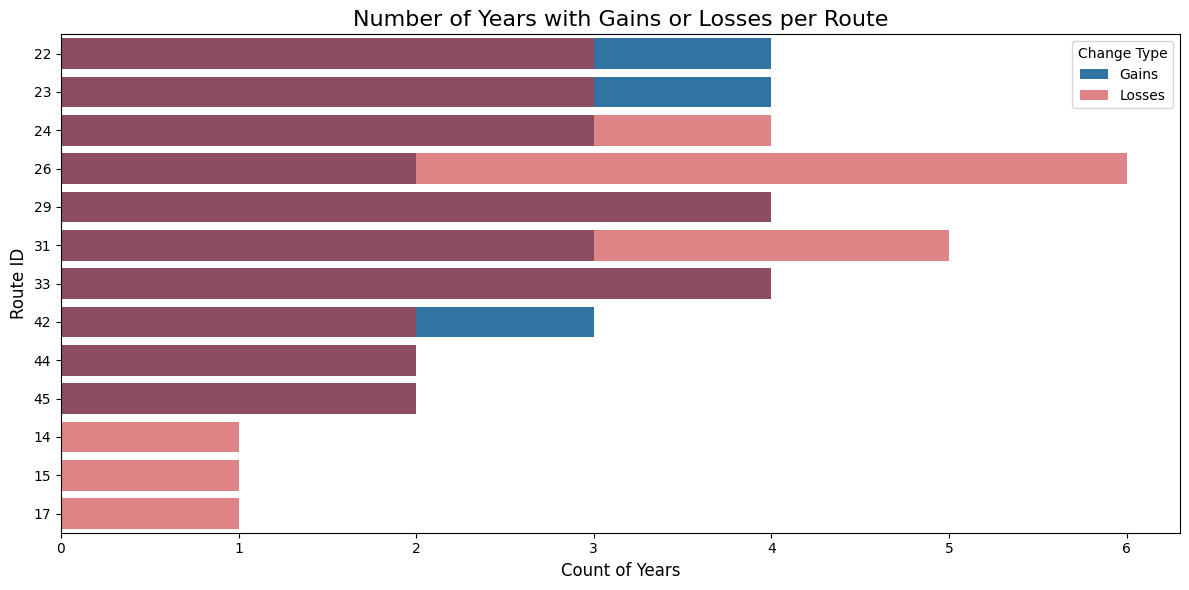

In [ ]:
# Visualization 3: Highlight Routes with Gains and Losses
# gain_color = "#1f78b4"  # Blue-green for gains
# loss_color = "#e31a1c" 

# plt.figure(figsize=(12, 6))
# sns.countplot(data=gains, y='route_id', color=gain_color, label="Gains")
# sns.countplot(data=losses, y='route_id', color=loss_color, label="Losses", alpha=0.6)
# plt.title("Number of Years with Gains or Losses per Route", fontsize=16)
# plt.xlabel("Count of Years", fontsize=12)
# plt.ylabel("Route ID", fontsize=12)
# plt.legend(title="Change Type")
# plt.tight_layout()
# plt.savefig('yearly_change_per_route.png', dpi=400)
# plt.show()
